
<h2 id="Analyze-A/B-Test-Results">Analyze A/B Test Results<a class="anchor-link" href="#Analyze-A/B-Test-Results">¶</a></h2><p>You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project <a href="https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric">RUBRIC</a>.  <strong>Please save regularly.</strong></p>
<p>This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!</p>
<h2 id="Table-of-Contents">Table of Contents<a class="anchor-link" href="#Table-of-Contents">¶</a></h2><ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#probability">Part I - Probability</a></li>
<li><a href="#ab_test">Part II - A/B Test</a></li>
<li><a href="#regression">Part III - Regression</a></li>
</ul>
<p><a id="intro"></a></p>
<h3 id="Introduction">Introduction<a class="anchor-link" href="#Introduction">¶</a></h3><p>A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these</p>
<p>For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.</p>
<p><strong>As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.</strong> The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the <a href="https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric">RUBRIC</a>.</p>
<p><a id="probability"></a></p>
<h4 id="Part-I---Probability">Part I - Probability<a class="anchor-link" href="#Part-I---Probability">¶</a></h4><p>To get started, let's import our libraries.</p>


In [2]:

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)




<p><code>1.</code> Now, read in the <code>ab_data.csv</code> data. Store it in <code>df</code>.  <strong>Use your dataframe to answer the questions in Quiz 1 of the classroom.</strong></p>
<p>a. Read in the dataset and take a look at the top few rows here:</p>


In [3]:

df = pd.read_csv('ab_data.csv')
df.head()



,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1



<p>b. Use the cell below to find the number of rows in the dataset.</p>


In [4]:

total = df.shape[0]
total



294478


<p>c. The number of unique users in the dataset.</p>


In [5]:

unique_users = df.user_id.nunique()
unique_users



290584


<p>d. The proportion of users converted.</p>


In [6]:

did_converted = df.query('converted == 1').shape[0]
did_converted/unique_users



0.12126269856564711


<p>e. The number of times the <code>new_page</code> and <code>treatment</code> don't match.</p>


In [7]:

df.query('landing_page == "new_page" & group != "treatment"').shape[0] + df.query('landing_page == "old_page" & group != "control"').shape[0]



3893


<p>f. Do any of the rows have missing values?</p>


In [8]:

df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB



<p><code>2.</code> For the rows where <strong>treatment</strong> does not match with <strong>new_page</strong> or <strong>control</strong> does not match with <strong>old_page</strong>, we cannot be sure if this row truly received the new or old page.  Use <strong>Quiz 2</strong> in the classroom to figure out how we should handle these rows.</p>
<p>a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in <strong>df2</strong>.</p>


In [9]:

df1 = df.drop(df.query('landing_page == "new_page" & group != "treatment"').index)
df2 = df1.drop(df.query('landing_page == "old_page" & group != "control"').index)



In [10]:

# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]



0


<p><code>3.</code> Use <strong>df2</strong> and the cells below to answer questions for <strong>Quiz3</strong> in the classroom.</p>



<p>a. How many unique <strong>user_id</strong>s are in <strong>df2</strong>?</p>


In [11]:

df2.nunique()



user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64


<p>b. There is one <strong>user_id</strong> repeated in <strong>df2</strong>.  What is it?</p>


In [12]:

df2[df2.user_id.duplicated()]



,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0



<p>c. What is the row information for the repeat <strong>user_id</strong>?</p>



<p>d. Remove <strong>one</strong> of the rows with a duplicate <strong>user_id</strong>, but keep your dataframe as <strong>df2</strong>.</p>


In [13]:

df2 = df2.drop(df2[df2.user_id.duplicated()].index)




<p><code>4.</code> Use <strong>df2</strong> in the cells below to answer the quiz questions related to <strong>Quiz 4</strong> in the classroom.</p>
<p>a. What is the probability of an individual converting regardless of the page they receive?</p>


In [14]:

df2[df2['converted']==1].shape[0]/df2.shape[0]



0.11959708724499628


<p>b. Given that an individual was in the <code>control</code> group, what is the probability they converted?</p>


In [15]:

(df2.query('group == "control"')['converted'] == 1).mean()



0.1203863045004612


<p>c. Given that an individual was in the <code>treatment</code> group, what is the probability they converted?</p>


In [16]:

(df2.query('group == "treatment"')['converted'] == 1).mean()



0.11880806551510564


<p>d. What is the probability that an individual received the new page?</p>


In [17]:

df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]



0.5000619442226688


<p>e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.</p>



<p><strong>no, we cannot say that new treatment page leads  to more conversion as there is a small diffrence between conversion rates of both</strong></p>



<p><a id="ab_test"></a></p>
<h3 id="Part-II---A/B-Test">Part II - A/B Test<a class="anchor-link" href="#Part-II---A/B-Test">¶</a></h3><p>Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.</p>
<p>However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?</p>
<p>These questions are the difficult parts associated with A/B tests in general.</p>
<p><code>1.</code> For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of <strong>$p_{old}$</strong> and <strong>$p_{new}$</strong>, which are the converted rates for the old and new pages.</p>



<p>Null hypothesis: conversion rate of the old page is more than or equal the new page 
alternative hypothesis : conversion rate of the new page is more than the old page</p>

$$
H_0 : p_{new} - p_{old} \leq 0 \\
H_1 : p_{new} - p_{old} > 0
$$



<p><code>2.</code> Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the <strong>converted</strong> success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the <strong>converted</strong> rate in <strong>ab_data.csv</strong> regardless of the page. <br/><br/></p>
<p>Use a sample size for each page equal to the ones in <strong>ab_data.csv</strong>.  <br/><br/></p>
<p>Perform the sampling distribution for the difference in <strong>converted</strong> between the two pages over 10,000 iterations of calculating an estimate from the null.  <br/><br/></p>
<p>Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use <strong>Quiz 5</strong> in the classroom to make sure you are on the right track.<br/><br/></p>



<p>a. What is the <strong>conversion rate</strong> for $p_{new}$ under the null?</p>


In [18]:

p_new = df2.query("converted == 1").shape[0]/df2.shape[0]
p_new



0.11959708724499628


<p>b. What is the <strong>conversion rate</strong> for $p_{old}$ under the null? <br/><br/></p>


In [19]:

p_old = df2.query("converted == 1").shape[0]/df2.shape[0]
p_old



0.11959708724499628


<p>c. What is $n_{new}$, the number of individuals in the treatment group?</p>


In [20]:

n_new = df2.query('group == "treatment"').shape[0]
n_new



145310


<p>d. What is $n_{old}$, the number of individuals in the control group?</p>


In [21]:

n_old = df2.query('group == "control"').shape[0]
n_old



145274


<p>e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in <strong>new_page_converted</strong>.</p>


In [22]:

new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted



array([0, 0, 0, ..., 0, 0, 1])


<p>f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in 
<strong>old_page_converted</strong>.</p>


In [23]:

old_page_converted = np.random.binomial(1, p_old, n_old)




<p>g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).</p>


In [24]:

new_page_converted.mean() - old_page_converted.mean()



-0.0016606743892999543


<p>h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called <strong>p_diffs</strong>.</p>


In [25]:

diffs = []
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    minus = new_page_converted.mean() - old_page_converted.mean()
    diffs.append(minus)




<p>i. Plot a histogram of the <strong>p_diffs</strong>.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.</p>


(array([  10.,   72.,  438., 1468., 2759., 2838., 1701.,  583.,  123.,
           8.]),
 array([-4.75820618e-03, -3.82077405e-03, -2.88334191e-03, -1.94590978e-03,
        -1.00847764e-03, -7.10455092e-05,  8.66386625e-04,  1.80381876e-03,
         2.74125089e-03,  3.67868303e-03,  4.61611516e-03]),
 <BarContainer object of 10 artists>)

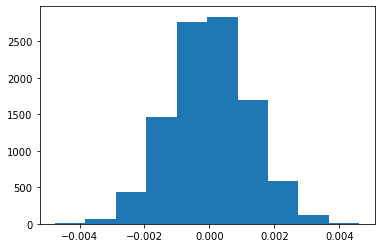

In [26]:

p_diffs = np.array(diffs)
plt.hist(p_diffs)




<p>j. What proportion of the <strong>p_diffs</strong> are greater than the actual difference observed in <strong>ab_data.csv</strong>?</p>


In [27]:

actual_obs = (df2.query('group == "treatment"')['converted'] == 1).mean() - (df2.query('group == "control"')['converted'] == 1).mean()



In [28]:

(p_diffs > actual_obs).mean()



0.9077


<p><strong>We have calculated the "P-Value" in the previous steps, P-Value is the proportion of extreme values of the sample we have simulated. the greater "P-Value" resulted  the more we tend to choose the null hypothesis(shouldn't be more than 0.005 to reject the null hypothesis) and due to the very big P-Value resulted from the previous simulation so, we fail to reject the null hypothesis.
in other words, our A/B Testing result came in favour of the old page and against the new page.</strong></p>



<p>l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let <code>n_old</code> and <code>n_new</code> refer the the number of rows associated with the old page and new pages, respectively.</p>


In [29]:

import statsmodels.api as sm

convert_old = df2[np.logical_and(df2['group']=='control', df2['converted'] == 1)].shape[0]
convert_new = df2[np.logical_and(df2['group']=='treatment', df2['converted'] == 1)].shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new =df2.query('group == "treatment"').shape[0]
 



In [30]:

convert_old, convert_new, n_old, n_new



(17489, 17264, 145274, 145310)


<p>m. Now use <code>stats.proportions_ztest</code> to compute your test statistic and p-value.  <a href="https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/">Here</a> is a helpful link on using the built in.</p>


In [31]:

z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value



(1.3109241984234394, 0.9050583127590245)


<p>n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts <strong>j.</strong> and <strong>k.</strong>?</p>



<p><strong>z-score represents how many standard deviations away our data point is from the mean, our z-score is positive which suggests that our data point is on the right side of the mean line on the bell curve.
p-value of 0.9050 is very close to the p-value we computed earlier in part, and again we fail to reject null hypothesis.</strong></p>



<p><a id="regression"></a></p>
<h3 id="Part-III---A-regression-approach">Part III - A regression approach<a class="anchor-link" href="#Part-III---A-regression-approach">¶</a></h3><p><code>1.</code> In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br/><br/></p>
<p>a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?</p>



<p><strong>Logistic Regression</strong></p>



<p>b. The goal is to use <strong>statsmodels</strong> to fit the regression model you specified in part <strong>a.</strong> to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an <strong>intercept</strong> column, as well as an <strong>ab_page</strong> column, which is 1 when an individual receives the <strong>treatment</strong> and 0 if <strong>control</strong>.</p>


In [32]:

df2[['new_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2['intercept'] = 1 
df2.head()



,user_id,timestamp,group,landing_page,converted,new_page,old_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,1



<p>c. Use <strong>statsmodels</strong> to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part <strong>b.</strong> to predict whether or not an individual converts.</p>


In [33]:

log_mod = sm.Logit(df2['converted'], df2[['intercept', 'new_page']])
result = log_mod.fit()
result.summary2()



Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-11-05 13:56 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
new_page     -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""


<p>d. Provide the summary of your model below, and use it as necessary to answer the following questions.</p>


In [34]:

new = 1/np.exp(-0.0150)
print('new page:{}'.format(new))



new page:1.015113064615719



<p>e. What is the p-value associated with <strong>ab_page</strong>? Why does it differ from the value you found in <strong>Part II</strong>?<br/><br/> <strong>Hint</strong>: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in <strong>Part II</strong>?</p>



<p><strong>p value of ab_page is approximately 0.19 in logistic regression model, while it was 0.9 in the hypothesis testing and that's because hypothesis testing is two tailed while logistic regression computing one tailed 
" 2 * (1 - p_value_one_tailed)"</strong></p>


$$
H_0 : p_{new} - p_{old} \leq 0 \\
H_1 : p_{new} - p_{old} > 0
$$


<p>f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?</p>



<p><strong>I think we shouldn't only look at the final results of each page and ignore other factors like the nature of marketing campaign for the institution before and after lanching the new page</strong></p>



<p>g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the <strong>countries.csv</strong> dataset and merge together your datasets on the appropriate rows.  <a href="https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html">Here</a> are the docs for joining tables.</p>
<p>Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - <strong>Hint: You will need two columns for the three dummy variables.</strong> Provide the statistical output as well as a written response to answer this question.</p>


In [35]:

# read file and join the dfs
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()



,country,timestamp,group,landing_page,converted,new_page,old_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [36]:

df_new.country.value_counts()



US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [37]:

#getting country coloumn dummies
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])



In [38]:

df_new.sample(6)



,country,timestamp,group,landing_page,converted,new_page,old_page,intercept,CA,UK,US
user_id,,,,,,,,,,,
849234,US,2017-01-15 15:57:36.311775,treatment,new_page,1,1,0,1,0,0,1
684955,US,2017-01-12 08:32:20.094849,treatment,new_page,0,1,0,1,0,0,1
637907,UK,2017-01-09 09:32:56.769700,treatment,new_page,0,1,0,1,0,1,0
641790,US,2017-01-22 18:34:46.878063,treatment,new_page,0,1,0,1,0,0,1
890752,UK,2017-01-13 05:27:01.647018,control,old_page,0,0,1,1,0,1,0
879950,US,2017-01-19 07:40:23.333206,treatment,new_page,0,1,0,1,0,0,1


In [39]:

#fitting logistic regression model
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'UK']])
result = log_mod.fit()
result.summary2()



Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2021-11-05 13:56 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
==================================================================

"""

In [40]:

1/np.exp(0.408), 1/np.exp(0.0507)



(0.6649788788224019, 0.9505637969004034)


<p>users from UK are 0.95 times more likely to convert as compared to users from CA, while users from Us are 0.66 times more likely to more convert as compared to users from CA</p>



<p>h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.</p>
<p>Provide the summary results, and your conclusions based on the results.</p>


In [41]:

#create the interaction columns
df_new['ab_uk'], df_new['ab_us'] = df_new['new_page']*df_new['UK'], df_new['new_page']*df_new['US']



In [42]:

#fitting logistic regression model
log_mod = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_uk', 'ab_us', 'US', 'UK']])
result = log_mod.fit()
result.summary2()



Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.3422
Date:               2021-11-05 13:56 BIC:              212835.2404
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           4                LL-Null:          -1.0639e+05
Df Residuals:       290579           LLR p-value:      0.22052    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
ab_uk          0.0108    0.0228    0.4749  0.6349  -0.0339   0.0555
ab_us         -0.0206    0.0137   -1.5052  0.1323  -0.0473   0.0062
US             0.0511    0.0277    1.8414  0.0656  -0.0033   0.1054
UK             0.0453    0.0306    1.4806  0.1387  -0.0147   0.1053
==================================================================

"""

In [43]:

uk = 1/np.exp(0.0453)
us = 1/np.exp(0.0511)
ab_uk = 1/np.exp(0.0108)
ab_us = 1/np.exp(-0.0206)
print('UK:{}, \n US:{}, ab_uk:{}, ab_us:{}'.format(uk, us, ab_uk, ab_us)) 



UK:0.9557107256041351, 
 US:0.9501836474166085, ab_uk:0.9892581106136482, ab_us:1.020813644503746



<p><strong>we can say that: users from UK are 0.95 times more likely to convert as compared to users from CA, while users from Us are 0.96 times more likely to more convert as compared to users from CA, and the interaction between ab_page with uk and ab_page with us is 0.99 and 1.02 respictevly </strong></p>



<h2 id="Conclusions">Conclusions<a class="anchor-link" href="#Conclusions">¶</a></h2><p>**in this project we have used <code>A/B Testing, Z-testing</code> processes, <code>Logistic Regression Model</code> in order to make our anlysis in the best quality.   We have three main stages of our analysis.</p>
<ul>
<li><strong>First, we cleaned some quality issues we dropped the duplicated and the missing values, then We perform the hypothesis testing on the dataset to get the closest answer to the truth, we calculated the p-value(which i have explained before), the result of this test came against the new page.</strong> </li>
<li><strong>We perform Z=testing in the third stage which again come against the new page.</strong></li>
<li><strong>And the final stage was the logistic regression model here we the resulted was that the new page leads to only 1.015 than the old page, so here we can confidently say that there is no reason to lanch the new page because there is no obvius diffrence between conversion of the new and the old one and better design a new third page to increase the conversion rate, also we added the country column in another step to see it's impact nad we found out that users from UK are 0.95 times more likely to convert as compared to users from CA, while users from Us are 0.66 times more likely to more convert as compared to users from CA</strong> </li>
</ul>




<p><a id="conclusions"></a></p>
<h2 id="Finishing-Up">Finishing Up<a class="anchor-link" href="#Finishing-Up">¶</a></h2><blockquote><p>Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!</p>
<p><strong>Tip</strong>: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.</p>
</blockquote>
<h2 id="Directions-to-Submit">Directions to Submit<a class="anchor-link" href="#Directions-to-Submit">¶</a></h2><blockquote><p>Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).</p>
<p>Alternatively, you can download this report as .html via the <strong>File</strong> &gt; <strong>Download as</strong> submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.</p>
<p>Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!</p>
</blockquote>


In [44]:

from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])



1